In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #ignora os avisos

In [34]:
pd.options.display.float_format = "{:,.2f}".format #ajusta o formato numérico exibido

# Aula 01: Aquisição e leitura de dados reais

Vamos começar importando nosso banco de dados. O arquivo csv que será lido no código abaixo foi gerado após uma consulta no site DATASUS. Eis o link, caso queira fazer a própria consulta:
http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi

A tabela mostra a produção hospitalar mensal (em reais) por unidade federativa, desde Janeiro de 2008 até Março de 2021. Os dados estão coletados por data de processamento. Isto é, se um dado se encontra na coluna 2008/Jan, siginifica que esse dado foi processado naquele mês. Porém o evento ao qual ele se refere pode ter ocorrido em qualquer data anterior. 

In [133]:
dados_proc = pd.read_csv("/content/A144053189_28_143_208.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")
dados_proc

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,"1,388,528.39","2,931,283.42","1,541,682.52","1,525,314.96","1,645,953.84","1,406,150.68","3,065,279.01","3,231,494.61","3,117,178.63","3,068,430.44","2,825,838.52","2,931,173.58","2,885,269.07","2,860,103.74","3,684,944.68","3,607,289.68","3,774,356.60","3,706,711.84","3,763,187.55","3,533,625.83",3605007.43,"3,907,032.72","3,939,820.71","3,901,084.11","3,684,407.02","3,623,015.58","3,890,461.90","4,193,533.87","4,534,400.67","4,451,208.03","4,874,592.78","4,460,802.38","5,067,886.24","4,511,092.85","4,394,680.50","4,098,741.80","4,411,499.48","3,868,617.95","4,298,702.78",...,"7,998,345.94","8,893,683.69","8,867,793.32","8,871,408.50","8,501,601.67","8,315,107.81","8,525,499.78","9,177,611.46","7,368,996.38","8,835,095.43","8,328,186.64","8,408,512.77","9,351,705.82","8,143,007.97","8,949,741.77","9,630,553.15","9,581,970.31","7,891,114.05","9,792,370.67","9,170,787.53","8,816,846.71","10,024,554.15","9,675,423.70","8,085,025.66","9,222,010.60","7,493,901.30","8,148,169.46","7,353,768.37","7,739,864.47","9,246,097.96","11,824,687.13","11,733,307.76","10,201,985.14","7,955,139.45","9,357,946.29","8,880,836.55","9,266,014.59","7,730,597.04","11,023,309.47","996,411,254.68"
1,12 Acre,"902,416.00","1,497,206.26","1,794,028.48","1,730,469.42","1,819,443.92","1,828,496.00","2,511,754.59","2,089,107.14","2,275,708.53","1,923,886.57","1,756,986.80","2,235,639.98","2,497,116.43","2,253,558.01","2,122,673.92","2,834,317.62","2,722,065.97","2,432,831.95","2,630,190.65","2,307,579.00",-,"2,826,477.02","2,170,791.18","2,541,526.44","2,491,042.33","1,954,473.90","2,389,996.38","2,654,878.60","2,844,085.21","2,336,207.19","2,125,143.06","2,430,293.67","2,377,738.44","2,184,746.84","2,468,452.90","2,516,284.54","3,051,370.08","2,629,104.42","2,485,451.79",...,"3,576,595.19","2,444,567.37","2,602,434.35","3,064,163.42","2,276,236.69","3,239,474.10","3,126,429.88","2,998,865.51","2,619,709.86","3,018,048.94","3,342,614.24","2,123,426.26","2,664,654.52","1,906,429.95","3,096,439.63","2,411,628.00","2,840,630.58","3,260,153.59","3,250,722.84","3,204,998.88","3,052,745.65","3,124,802.29","3,021,521.75","2,874,871.28","3,331,803.55","3,417,691.07","3,076,003.20","2,286,642.60","2,896,340.24","3,045,245.80","3,915,193.20","3,640,142.82","3,391,242.21","4,044,321.44","3,276,590.10","3,696,997.31","3,715,723.12","3,538,427.92","4,077,045.92","450,048,530.47"
2,13 Amazonas,"4,735,529.42","7,118,990.57","8,196,635.49","8,259,378.42","7,831,399.90","8,477,273.62","9,368,858.72","9,352,532.70","9,363,099.35","8,618,318.83","6,555,549.08","7,777,645.88","7,403,068.36","6,683,346.89","9,927,781.20","8,844,511.21","9,079,035.96","8,832,894.53","9,373,395.97","9,578,326.03",9730634.16,"9,179,252.65","8,314,648.93","9,050,439.39","9,419,460.86","8,680,178.57","9,168,055.41","9,897,901.80","9,651,362.37","10,854,599.47","10,417,122.89","8,718,347.13","8,221,592.12","9,613,977.03","9,927,574.41","9,470,661.21","9,736,750.91","8,745,259.80","9,380,112.36",...,"13,572,263.03","13,083,081.70","14,322,305.22","14,643,340.51","14,632,208.09","14,500,521.14","14,840,533.42","14,427,620.91","15,818,964.25","16,358,462.57","15,391,163.74","14,154,362.85","16,791,397.31","14,369,987.43","16,339,024.96","15,622,910.63","16,483,166.92","

Percebemos que os nomes das unidades federativas estão num formato ruim. Vamos retirar esses números da frente dos nomes. 

In [134]:
dados_proc['Unidade da Federação'] = dados_proc['Unidade da Federação'].str.slice(3,)
dados_proc

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,"1,388,528.39","2,931,283.42","1,541,682.52","1,525,314.96","1,645,953.84","1,406,150.68","3,065,279.01","3,231,494.61","3,117,178.63","3,068,430.44","2,825,838.52","2,931,173.58","2,885,269.07","2,860,103.74","3,684,944.68","3,607,289.68","3,774,356.60","3,706,711.84","3,763,187.55","3,533,625.83",3605007.43,"3,907,032.72","3,939,820.71","3,901,084.11","3,684,407.02","3,623,015.58","3,890,461.90","4,193,533.87","4,534,400.67","4,451,208.03","4,874,592.78","4,460,802.38","5,067,886.24","4,511,092.85","4,394,680.50","4,098,741.80","4,411,499.48","3,868,617.95","4,298,702.78",...,"7,998,345.94","8,893,683.69","8,867,793.32","8,871,408.50","8,501,601.67","8,315,107.81","8,525,499.78","9,177,611.46","7,368,996.38","8,835,095.43","8,328,186.64","8,408,512.77","9,351,705.82","8,143,007.97","8,949,741.77","9,630,553.15","9,581,970.31","7,891,114.05","9,792,370.67","9,170,787.53","8,816,846.71","10,024,554.15","9,675,423.70","8,085,025.66","9,222,010.60","7,493,901.30","8,148,169.46","7,353,768.37","7,739,864.47","9,246,097.96","11,824,687.13","11,733,307.76","10,201,985.14","7,955,139.45","9,357,946.29","8,880,836.55","9,266,014.59","7,730,597.04","11,023,309.47","996,411,254.68"
1,Acre,"902,416.00","1,497,206.26","1,794,028.48","1,730,469.42","1,819,443.92","1,828,496.00","2,511,754.59","2,089,107.14","2,275,708.53","1,923,886.57","1,756,986.80","2,235,639.98","2,497,116.43","2,253,558.01","2,122,673.92","2,834,317.62","2,722,065.97","2,432,831.95","2,630,190.65","2,307,579.00",-,"2,826,477.02","2,170,791.18","2,541,526.44","2,491,042.33","1,954,473.90","2,389,996.38","2,654,878.60","2,844,085.21","2,336,207.19","2,125,143.06","2,430,293.67","2,377,738.44","2,184,746.84","2,468,452.90","2,516,284.54","3,051,370.08","2,629,104.42","2,485,451.79",...,"3,576,595.19","2,444,567.37","2,602,434.35","3,064,163.42","2,276,236.69","3,239,474.10","3,126,429.88","2,998,865.51","2,619,709.86","3,018,048.94","3,342,614.24","2,123,426.26","2,664,654.52","1,906,429.95","3,096,439.63","2,411,628.00","2,840,630.58","3,260,153.59","3,250,722.84","3,204,998.88","3,052,745.65","3,124,802.29","3,021,521.75","2,874,871.28","3,331,803.55","3,417,691.07","3,076,003.20","2,286,642.60","2,896,340.24","3,045,245.80","3,915,193.20","3,640,142.82","3,391,242.21","4,044,321.44","3,276,590.10","3,696,997.31","3,715,723.12","3,538,427.92","4,077,045.92","450,048,530.47"
2,Amazonas,"4,735,529.42","7,118,990.57","8,196,635.49","8,259,378.42","7,831,399.90","8,477,273.62","9,368,858.72","9,352,532.70","9,363,099.35","8,618,318.83","6,555,549.08","7,777,645.88","7,403,068.36","6,683,346.89","9,927,781.20","8,844,511.21","9,079,035.96","8,832,894.53","9,373,395.97","9,578,326.03",9730634.16,"9,179,252.65","8,314,648.93","9,050,439.39","9,419,460.86","8,680,178.57","9,168,055.41","9,897,901.80","9,651,362.37","10,854,599.47","10,417,122.89","8,718,347.13","8,221,592.12","9,613,977.03","9,927,574.41","9,470,661.21","9,736,750.91","8,745,259.80","9,380,112.36",...,"13,572,263.03","13,083,081.70","14,322,305.22","14,643,340.51","14,632,208.09","14,500,521.14","14,840,533.42","14,427,620.91","15,818,964.25","16,358,462.57","15,391,163.74","14,154,362.85","16,791,397.31","14,369,987.43","16,339,024.96","15,622,910.63","16,483,166.92","15,422,24

Vejamos a média dos dados:

In [135]:
dados_proc.mean()

2008/Jan      15,126,846.64
2008/Fev      22,710,158.12
2008/Mar      24,594,187.35
2008/Abr      25,431,957.83
2008/Mai      26,511,245.91
                 ...       
2020/Dez      53,377,763.15
2021/Jan      56,073,748.02
2021/Fev      55,578,233.31
2021/Mar      62,502,301.42
Total      6,388,213,338.48
Length: 159, dtype: float64

Se quisermos, podemos consultar a média de apenas um dos meses:

In [136]:
dados_proc['2008/Ago'].mean()

27800320.306666665

É possível consultar também a média por unidade da federação. Para isso, podemos passar o parâmetro axis = 1 na função mean()

In [137]:
dados_proc.mean(axis = 1)

0     12,510,801.90
1      5,660,987.80
2     24,055,127.28
3      4,126,115.21
4     59,010,377.58
5      3,884,816.70
6     12,789,393.88
7     48,568,654.72
8     28,613,399.86
9     82,699,381.89
10    33,377,548.66
11    32,790,694.40
12   107,700,684.80
13    28,060,754.41
14    15,253,864.33
15   122,825,434.42
16   256,229,962.25
17    42,744,145.12
18   129,702,859.17
19   519,326,513.43
20   184,259,028.86
21    98,318,502.79
22   160,140,612.27
23    29,163,851.68
24    27,354,900.26
25    62,402,008.69
26    32,517,978.95
dtype: float64

Poodemos filtrar a análise acima por estado, digamos, Ceará (meu estado natal):

In [138]:
dados_proc[dados_proc['Unidade da Federação'] == 'Ceará'].mean(axis = 1)

9   82,699,381.89
dtype: float64

Agora vamos criar alguns gráficos. Primeiramente, gráficos de barra com informações dos gastos por estado em Agosto de 2008 e Março de 2021.

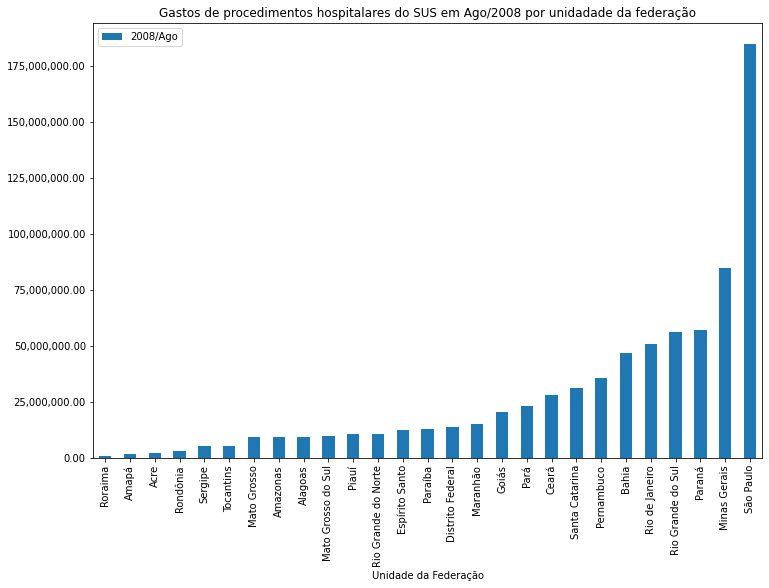

In [139]:
import matplotlib.ticker as ticker

ax = dados_proc.sort_values(by = '2008/Ago').plot(x="Unidade da Federação", y="2008/Ago", kind = 'bar', figsize = (12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Gastos de procedimentos hospitalares do SUS em Ago/2008 por unidadade da federação')
plt.show()

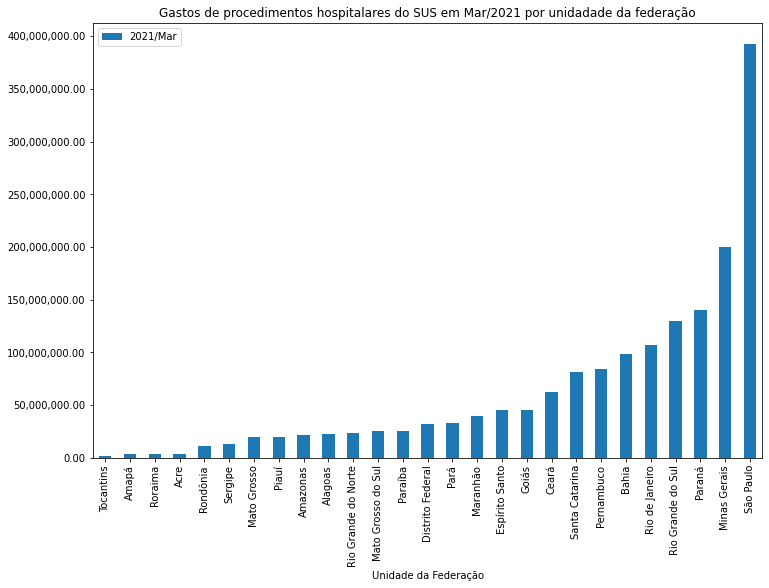

In [140]:
ax = dados_proc.sort_values(by = '2021/Mar').plot(x="Unidade da Federação", y="2021/Mar", kind = 'bar', figsize = (12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Gastos de procedimentos hospitalares do SUS em Mar/2021 por unidadade da federação')
plt.show()

Percebemos uma maior concentração de recuros no Sul e Sudeste, sendo que São Paulo está disparado em primeiro lugar.

Podemos visualizar graficamente a evolução dos gastos ao longo dos meses em um estado específico (e.g., Ceará).

In [141]:
gastos_CE = dados_proc.iloc[9][1:160].astype(float) #pegamos de 1 a 160 para excluir as colunas 'unidade da federação' e 'total'. Usamos o astype(float) pois há entradas que são string.
gastos_CE

2008/Jan   15,539,821.90
2008/Fev   25,735,101.55
2008/Mar   28,724,625.75
2008/Abr   30,676,457.06
2008/Mai   30,604,453.47
                ...     
2020/Nov   56,916,499.66
2020/Dez   50,849,353.22
2021/Jan   52,078,218.88
2021/Fev   53,171,253.41
2021/Mar   62,079,618.54
Name: 9, Length: 159, dtype: float64

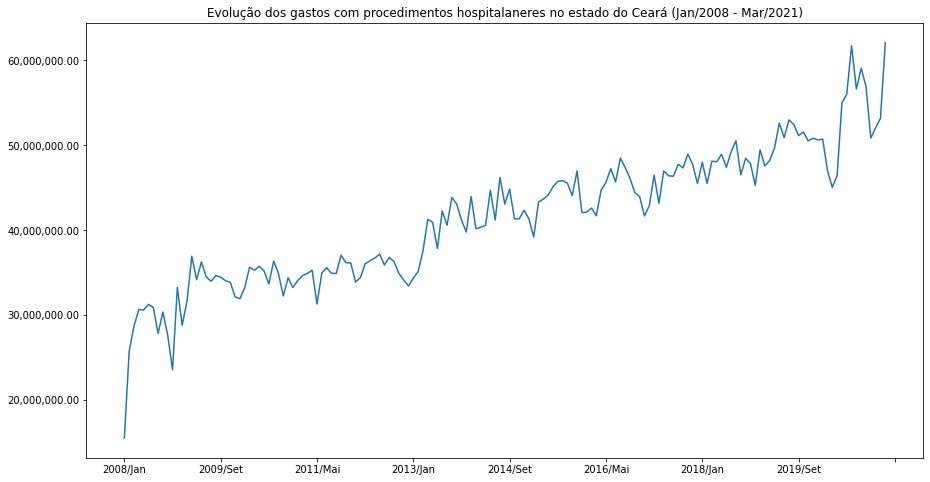

In [142]:
ax = gastos_CE.plot(figsize = (15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Evolução dos gastos com procedimentos hospitalaneres no estado do Ceará (Jan/2008 - Mar/2021)')
plt.show()

Observamos então que há uma tendência de aumento dos gastos. 

#Aula 02: Primeiras visualizações de dados

In [147]:
dados_atend = pd.read_csv("/content/A184117189_28_143_208.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")
dados_atend

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"8,457,455.71","7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68"
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,968,168.75","2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47"
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,351,607.47","16,339,427.95","14,821,977.50","14,965,815.90","15,982,353.42","15,166,470.82","14,815,958.58","16,379,386.07","19,625,325.21","18,433,057.47","19,303,743.16","18,687,233.58","18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80","1,917,247,936.05"
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,740,952.07","2,478,349.44","2,674,958.94","2,721,261.19","2,844,811.66","2,967,161.35","2,841,587.97","3,328,230.63","2,878,691.04","2,964,324.32","2,524,712.40","2,462,451.64","2,662,240.18","2,499,996.16","2,846,135.56","2,789,823.29","2,839,389.53","2,647,540.20","2,865,777.71","3,181,321.82","3,070,436.96","3,162,342.44","3,121,104.71","2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,306,119.95","2,921,522.16","3,300,012.98","3,192,075.41","3,262,354.34","2,978,629.22","3,313,296.78","3,527,263.23","3,125,021.90","3,209,323.68","3,044,798.77","2,381,844.31","328,876,965.09"
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"33,615,836.09","30,623,491.62","34,121,931.00","35,039,954.20","35,424,611.06","34,160,283.18","34,484,949.49","35,618,364.04","34,380,916.90","38,441,090.50","33,583,538.08","32,789,354.87","34,513,534.80","31,885,919.67","33,236,155.79","31,008,924.95","31,064,106.50","28,543,179.30","36,713,929.36","36,462,011.47","36,792,954.02","36,984,

In [148]:
dados_atend['Unidade da Federação'] = dados_atend['Unidade da Federação'].str.slice(3,)
dados_atend

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"8,457,455.71","7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68"
1,Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,968,168.75","2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47"
2,Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,351,607.47","16,339,427.95","14,821,977.50","14,965,815.90","15,982,353.42","15,166,470.82","14,815,958.58","16,379,386.07","19,625,325.21","18,433,057.47","19,303,743.16","18,687,233.58","18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80","1,917,247,936.05"
3,Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,740,952.07","2,478,349.44","2,674,958.94","2,721,261.19","2,844,811.66","2,967,161.35","2,841,587.97","3,328,230.63","2,878,691.04","2,964,324.32","2,524,712.40","2,462,451.64","2,662,240.18","2,499,996.16","2,846,135.56","2,789,823.29","2,839,389.53","2,647,540.20","2,865,777.71","3,181,321.82","3,070,436.96","3,162,342.44","3,121,104.71","2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,306,119.95","2,921,522.16","3,300,012.98","3,192,075.41","3,262,354.34","2,978,629.22","3,313,296.78","3,527,263.23","3,125,021.90","3,209,323.68","3,044,798.77","2,381,844.31","328,876,965.09"
4,Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"33,615,836.09","30,623,491.62","34,121,931.00","35,039,954.20","35,424,611.06","34,160,283.18","34,484,949.49","35,618,364.04","34,380,916.90","38,441,090.50","33,583,538.08","32,789,354.87","34,513,534.80","31,885,919.67","33,236,155.79","31,008,924.95","31,064,106.50","28,543,179.30","36,713,929.36","36,462,011.47","36,792,954.02","36,984,314.60","35,579

In [149]:
dados_atend.dtypes

Unidade da Federação     object
1992/Mar                 object
1992/Abr                 object
1993/Mai                 object
1993/Dez                 object
                         ...   
2020/Dez                float64
2021/Jan                float64
2021/Fev                float64
2021/Mar                float64
Total                   float64
Length: 287, dtype: object

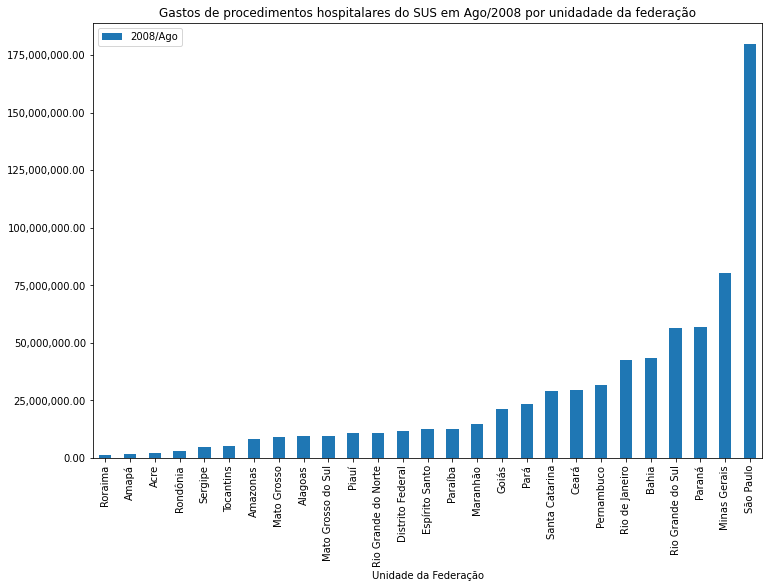

In [150]:
import matplotlib.ticker as ticker

ax = dados_atend.sort_values(by = '2008/Ago').plot(x="Unidade da Federação", y="2008/Ago", kind = 'bar', figsize = (12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Gastos de procedimentos hospitalares do SUS em Ago/2008 por unidadade da federação')
plt.show()

In [ ]:
colunas_usaveis = dados_atend.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

In [155]:
dados = dados_atend[colunas_usaveis]
dados.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,"4,209.37","16,397.03","133,645.19","346,912.84","711,758.31","1,829,559.71","1,940,792.63","1,955,721.68","2,143,353.81","2,280,382.58","2,624,542.97","2,973,421.02","2,938,286.29","2,843,930.91","2,878,153.20","2,780,022.62","2,651,804.89","3,147,566.24","3,082,108.12","4,190,355.33","4,040,251.62","3,946,423.71","3,372,377.96","3,720,608.86","3,787,323.26","3,679,369.94","3,866,146.99","3,667,808.60","3,633,471.79","3,812,315.59","3,911,776.03","4,663,060.75","4,524,544.88","4,778,755.26","4,369,733.23","4,632,439.12","4,464,307.47","4,668,642.02","4,490,368.23",...,"8,457,455.71","7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68"
1,Acre,"10,470.07","14,001.71","86,200.85","301,323.68","769,612.36","1,731,744.62","1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93","2,112,576.82","2,029,128.01","1,886,871.84","2,084,884.80","2,230,838.45","2,122,013.12","2,196,651.69","2,152,239.30","2,086,775.61","2,476,364.26","2,396,887.63","2,610,261.80","2,174,098.10","2,051,885.16","1,714,707.91","1,341,532.34","2,288,458.90","2,462,712.79","2,254,900.20","2,381,535.93","2,079,981.05","2,564,837.77","2,588,318.06","2,538,525.67","2,319,786.41","2,279,156.60","2,454,599.37","2,578,923.75","2,625,443.29",...,"2,968,168.75","2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47"
2,Amazonas,"35,752.72","45,570.64","416,012.30","2,020,381.79","5,949,408.99","11,419,210.08","7,934,652.10","8,641,517.13","8,531,576.49","9,079,902.15","8,646,295.77","8,755,806.50","8,331,763.97","8,148,089.92","7,681,661.02","7,761,445.21","7,764,782.66","8,607,222.74","8,385,962.92","9,207,129.28","8,160,517.20","8,562,322.43","9,484,998.71","9,465,068.52","9,267,006.58","9,092,823.55","9,218,407.34","8,674,068.02","8,365,788.46","9,386,945.03","8,373,048.81","10,321,150.01","9,990,164.13","9,767,161.23","9,151,838.50","9,140,196.88","9,437,224.41","9,742,680.49","9,996,686.44",...,"14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642

In [156]:
dados = dados.set_index("Unidade da Federação")
dados

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,"4,209.37","16,397.03","133,645.19","346,912.84","711,758.31","1,829,559.71","1,940,792.63","1,955,721.68","2,143,353.81","2,280,382.58","2,624,542.97","2,973,421.02","2,938,286.29","2,843,930.91","2,878,153.20","2,780,022.62","2,651,804.89","3,147,566.24","3,082,108.12","4,190,355.33","4,040,251.62","3,946,423.71","3,372,377.96","3,720,608.86","3,787,323.26","3,679,369.94","3,866,146.99","3,667,808.60","3,633,471.79","3,812,315.59","3,911,776.03","4,663,060.75","4,524,544.88","4,778,755.26","4,369,733.23","4,632,439.12","4,464,307.47","4,668,642.02","4,490,368.23","4,423,840.08",...,"8,457,455.71","7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68"
Acre,"10,470.07","14,001.71","86,200.85","301,323.68","769,612.36","1,731,744.62","1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93","2,112,576.82","2,029,128.01","1,886,871.84","2,084,884.80","2,230,838.45","2,122,013.12","2,196,651.69","2,152,239.30","2,086,775.61","2,476,364.26","2,396,887.63","2,610,261.80","2,174,098.10","2,051,885.16","1,714,707.91","1,341,532.34","2,288,458.90","2,462,712.79","2,254,900.20","2,381,535.93","2,079,981.05","2,564,837.77","2,588,318.06","2,538,525.67","2,319,786.41","2,279,156.60","2,454,599.37","2,578,923.75","2,625,443.29","2,512,995.15",...,"2,968,168.75","2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47"
Amazonas,"35,752.72","45,570.64","416,012.30","2,020,381.79","5,949,408.99","11,419,210.08","7,934,652.10","8,641,517.13","8,531,576.49","9,079,902.15","8,646,295.77","8,755,806.50","8,331,763.97","8,148,089.92","7,681,661.02","7,761,445.21","7,764,782.66","8,607,222.74","8,385,962.92","9,207,129.28","8,160,517.20","8,562,322.43","9,484,998.71","9,465,068.52","9,267,006.58","9,092,823.55","9,218,407.34","8,674,068.02","8,365,788.46","9,386,945.03","8,373,048.81","10,321,150.01","9,990,164.13","9,767,161.23","9,151,838.50","9,140,196.88","9,437,224.41","9,742,680.49","9,996,686.44","9,532,878.27",...,"14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,25

In [157]:
dados = dados.drop('Total', axis = 1)

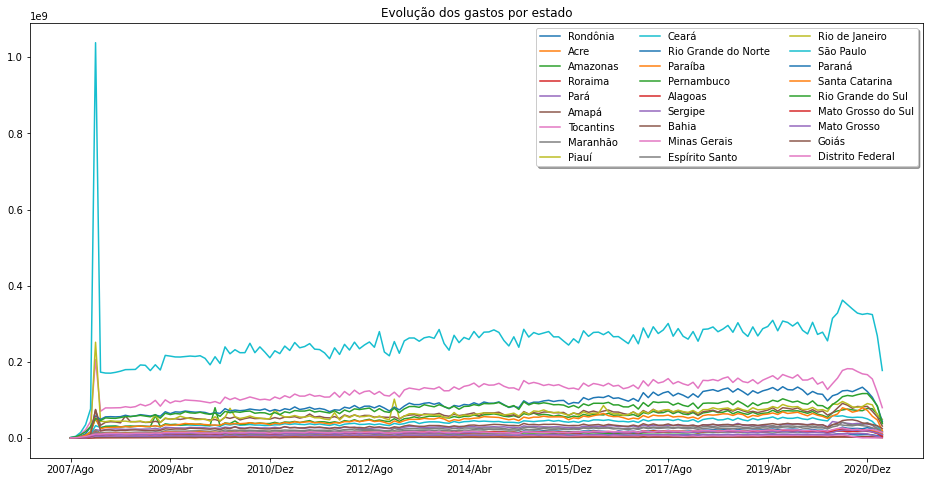

In [186]:
dados.T.plot(figsize = (16,8))
plt.legend(loc='upper right', ncol=3, shadow=True) #deixar a legenda mais bonita 
plt.title('Evolução dos gastos por estado')
plt.show()

Observamos que tem um outlier bem estranho no gráfico, especialmente para a linha que corresponde ao estado de São Paulo. 

In [180]:
dados.loc['São Paulo'].describe()

count             164.00
mean      252,356,909.95
std        82,622,289.80
min         1,665,349.90
25%       224,148,557.24
50%       258,052,131.35
75%       279,054,797.09
max     1,038,067,423.15
Name: São Paulo, dtype: float64

Notamos então esse valor máximo de mais de 1 bilhão, que estão bem destoante da média (aprox. 252 milhões). 

O gráfico acima, porém, está um pouco ruim, pois contém muitas informações. Vamos limpar a visualização, plotando apenas os gráficos dos cinco estados com maior média de gastos. Começamos vendo a média dos gastos de todos:

In [188]:
dados.T.mean().sort_values(ascending = False)

Unidade da Federação
São Paulo             252,356,909.95
Minas Gerais          124,501,252.85
Paraná                 89,520,374.85
Rio Grande do Sul      77,830,941.73
Rio de Janeiro         63,031,886.46
Bahia                  59,704,244.73
Pernambuco             52,322,656.51
Santa Catarina         47,773,610.09
Ceará                  40,194,056.93
Goiás                  30,326,250.00
Pará                   28,690,795.53
Maranhão               23,603,721.72
Espírito Santo         20,767,310.83
Rio Grande do Norte    16,219,913.44
Paraíba                15,944,486.74
Distrito Federal       15,806,761.24
Mato Grosso do Sul     14,173,874.23
Piauí                  13,907,773.41
Alagoas                13,636,594.34
Mato Grosso            13,293,353.95
Amazonas               11,690,518.93
Sergipe                 7,413,679.37
Tocantins               6,219,452.77
Rondônia                6,075,674.70
Acre                    2,744,190.53
Roraima                 2,005,344.83
Amapá            

Vemos então que os cinco estados com maior média de gastos são: São Paulo, Minas Gerais, Paraná, Rio Grande do Sul e Rio de Janeiro. Vamos coletar esses nomes em uma lista:

In [193]:
maiores_gastos = dados.T.mean().sort_values(ascending = False)[0:5].index.tolist()
maiores_gastos

['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul', 'Rio de Janeiro']

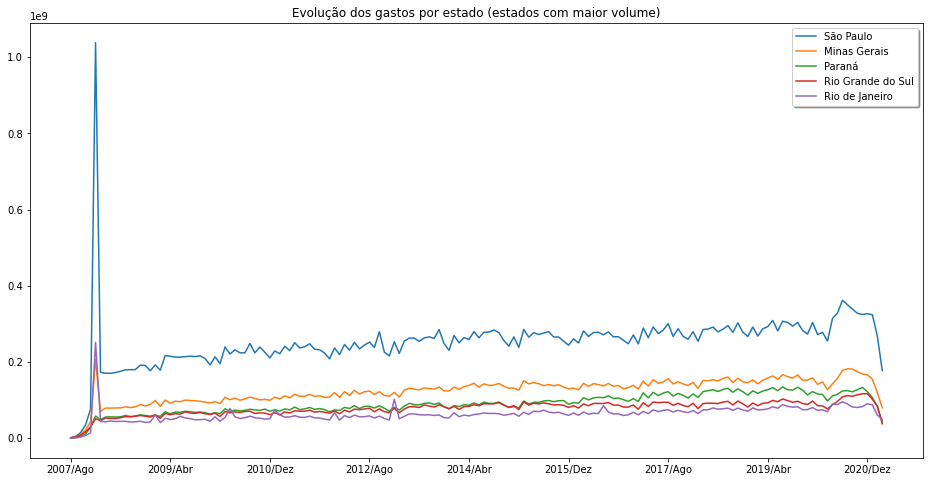

In [201]:
dados.T[maiores_gastos].plot(figsize = (16,8))
plt.legend(loc='upper right', shadow=True) 
plt.title('Evolução dos gastos por estado (estados com maior volume)')
plt.show()

Também podemos fazer um slice nos dados, para evitar incluir esse outlier no começo que está atrapalhando uma melhor visualização.

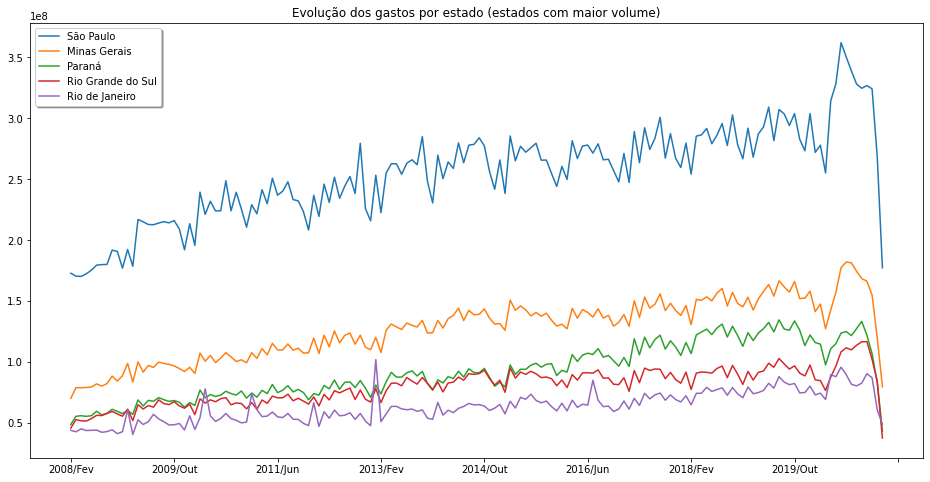

In [204]:
dados.T[maiores_gastos][6:].plot(figsize = (16,8))
plt.legend(loc='upper left', shadow=True) 
plt.title('Evolução dos gastos por estado (estados com maior volume)')
plt.show()

Visualmente, observamos que parece haver uma correlação alta entre esses valores. Vamos verificar isso numericamente:

In [203]:
dados.T[maiores_gastos].corr()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro
Unidade da Federação,,,,,
São Paulo,1.00,0.78,0.54,0.56,0.96
Minas Gerais,0.78,1.00,0.92,0.93,0.80
Paraná,0.54,0.92,1.00,0.94,0.60
Rio Grande do Sul,0.56,0.93,0.94,1.00,0.59
Rio de Janeiro,0.96,0.80,0.60,0.59,1.00


Realmente, são correlações bem altas. São Paulo e Rio de Janeiro, por exemplo ,tem uma correlação quase 1, assim como Rio Grande do Sul e Paraná e Rio Grande do Sul e Minas Gerais. Se quisermos, podemos analisar as correlações entre todos os estados. 

In [210]:
corelacao = pd.DataFrame(dados.T.corr())
corelacao

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,1.00,0.79,0.87,0.92,0.84,0.74,0.22,0.94,0.88,0.92,0.92,0.79,0.92,0.88,0.89,0.88,0.88,0.93,0.53,0.47,0.94,0.93,0.91,0.91,0.91,0.76,0.86
Acre,0.79,1.00,0.75,0.73,0.85,0.76,0.51,0.85,0.86,0.88,0.82,0.82,0.81,0.85,0.84,0.89,0.84,0.83,0.52,0.51,0.82,0.85,0.90,0.89,0.89,0.74,0.80
Amazonas,0.87,0.75,1.00,0.91,0.88,0.83,0.10,0.90,0.90,0.89,0.95,0.83,0.88,0.87,0.89,0.88,0.87,0.94,0.65,0.58,0.90,0.91,0.89,0.90,0.89,0.78,0.91
Roraima,0.92,0.73,0.91,1.00,0.85,0.77,0.10,0.91,0.88,0.86,0.92,0.81,0.88,0.85,0.87,0.85,0.84,0.92,0.54,0.47,0.93,0.89,0.87,0.88,0.88,0.71,0.91
Pará,0.84,0.85,0.88,0.85,1.00,0.90,0.44,0.93,0.94,0.96,0.91,0.93,0.86,0.93,0.92,0.92,0.88,0.87,0.60,0.56,0.91,0.90,0.91,0.94,0.93,0.77,0.92
Amapá,0.74,0.76,0.83,0.77,0.90,1.00,0.43,0.86,0.88,0.87,0.87,0.89,0.77,0.86,0.86,0.85,0.82,0.80,0.56,0.52,0.83,0.83,0.86,0.88,0.85,0.71,0.89
Tocantins,0.22,0.51,0.10,0.10,0.44,0.43,1.00,0.35,0.33,0.43,0.26,0.48,0.25,0.39,0.35,0.40,0.35,0.15,0.20,0.24,0.29,0.29,0.34,0.37,0.34,0.32,0.28
Maranhão,0.94,0.85,0.90,0.91,0.93,0.86,0.35,1.00,0.93,0.97,0.96,0.90,0.94,0.96,0.94,0.95,0.95,0.94,0.66,0.62,0.96,0.97,0.95,0.96,0.95,0.86,0.92
Piauí,0.88,0.86,0.90,0.88,0.94,0.88,0.33,0.93,1.00,0.95,0.95,0.91,0.89,0.92,0.93,0.95,0.91,0.94,0.63,0.59,0.92,0.94,0.95,0.96,0.96,0.83,0.94


Usaremos o describe() para melhor visualizar essas informações.

In [209]:
corelacao.describe()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,0.83,0.80,0.83,0.81,0.86,0.80,0.34,0.89,0.88,0.89,0.88,0.84,0.85,0.88,0.87,0.89,0.88,0.86,0.64,0.61,0.87,0.89,0.88,0.88,0.88,0.81,0.85
std,0.17,0.12,0.17,0.18,0.13,0.13,0.17,0.14,0.14,0.13,0.16,0.11,0.15,0.12,0.14,0.12,0.12,0.17,0.15,0.16,0.16,0.14,0.15,0.15,0.15,0.12,0.15
min,0.22,0.51,0.10,0.10,0.44,0.43,0.10,0.35,0.33,0.43,0.26,0.48,0.25,0.39,0.35,0.40,0.35,0.15,0.20,0.24,0.29,0.29,0.34,0.37,0.34,0.32,0.28
25%,0.82,0.77,0.85,0.82,0.85,0.77,0.25,0.90,0.88,0.88,0.90,0.82,0.85,0.87,0.87,0.88,0.87,0.85,0.58,0.54,0.89,0.88,0.89,0.88,0.89,0.78,0.86
50%,0.88,0.83,0.89,0.87,0.91,0.85,0.34,0.94,0.92,0.93,0.94,0.88,0.90,0.92,0.91,0.93,0.92,0.92,0.62,0.57,0.93,0.94,0.93,0.93,0.93,0.82,0.90
75%,0.92,0.86,0.90,0.91,0.93,0.87,0.39,0.96,0.94,0.96,0.95,0.90,0.92,0.94,0.94,0.95,0.93,0.94,0.68,0.64,0.94,0.96,0.95,0.96,0.95,0.86,0.92
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Curioso observar que os dados do estado de Tocatins tem uma correçalão média muito baixa com os outros estados. 